Simple muon and neutrino flux calculation
-----------------------------------------

This notebook demonstrates the basic use case of the solver. It calculates the atmospheric lepton flux, taking most of the configuration values from the 'global' config file `mceq_config.py`. The interaction model and the primary cosmic ray flux model are selected during initialization.

In [1]:
#basic imports and ipython setup
%load_ext autoreload
%matplotlib inline
%autoreload 2
import os
import matplotlib.pyplot as plt
import numpy as np
os.chdir('..')

#import solver related modules
from MCEq.core import MCEqRun
from mceq_config import config
#import primary model choices
import CRFluxModels as pm

/home/jp/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')



# Differences between hadronic interaction models

In [6]:
# Create the model
model_tuples = ((pm.SimplePowerlaw27, '2.7'),
                (pm.PolyGonato, 'Polygonato'),
                (pm.HillasGaisser2012,"H4a"),
                (pm.HillasGaisser2012,"H3a"),
                (pm.GaisserStanevTilav, '4-gen'),
                (pm.GaisserHonda, 'GH'))
theta_angles_deg = np.rad2deg(np.arccos(np.linspace(0, 1, 16)))

In [3]:
# I don't know if you always get 72 Energy points, but for now I'm taking them
mceq_run = MCEqRun(
    interaction_model='SIBYLL2.3_rc1',
    primary_model=model_tuples[0],
    theta_deg=0.,
    **config
    )
mceq_run.solve()


Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta-", "D*0", 
"D*0-bar", "XiC*0-bar", "XiC*+-bar", "XiC*+", "XiC*0", "Ds*+", "Ds*

100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.



MCEqRun::_forward_euler(): time elapsed during integration: 9.4628469944 sec


100% |##########################################################| Time: 0:00:09


In [4]:
epoints=len(mceq_run.e_grid)
e_grid = mceq_run.e_grid
mag=0

In [8]:
import sys
import pickle
data = pickle.load(open('/home/jp/projects/MCEq/data/yield_dict.ppd'))
print 'Interaction models available'
preint_models = data.keys()


fluxes = {}
int_models = []
# Remove non-models
for one_model in preint_models:
    if not one_model in ['evec','ebins']:
        int_models.append(one_model)
        
int_models

Interaction models available


['QGSJET-II-04',
 'QGSJET-01',
 'QGSJET-II-03',
 'DPMJET-2.55',
 'SIBYLL2.3_rc1',
 'SIBYLL2.1',
 'SIBYLL2.3_rc1_pl']

In [20]:
for model_i, had_model in enumerate(int_models):
    fluxes[had_model] = {'mu_total':   np.zeros([epoints, len(theta_angles_deg)]),
                         'numu_total': np.zeros([epoints, len(theta_angles_deg)]),
                         'nue_total':  np.zeros([epoints, len(theta_angles_deg)])}
    mceq_run = MCEqRun(
        interaction_model=had_model,
        primary_model=(pm.SimplePowerlaw27, '2.7'),
        theta_deg = 0.,
        **config
        )    
    for theta_i, one_theta_angle in enumerate(theta_angles_deg):

        mceq_run.set_theta_deg(one_theta_angle)
    
        # Solve
        mceq_run.solve()

        # Get results

        # total means conventional + prompt
        fluxes[had_model]['mu_total'][:,theta_i] = (mceq_run.get_solution('total_mu+', mag)
                            + mceq_run.get_solution('total_mu-', mag))

        # same meaning of prefixes for muon neutrinos as for muons
        fluxes[had_model]['numu_total'][:,theta_i] = (mceq_run.get_solution('total_numu', mag)
                              + mceq_run.get_solution('total_antinumu', mag))

        # same meaning of prefixes for electron neutrinos as for muons
        fluxes[had_model]['nue_total'][:,theta_i] = (mceq_run.get_solution('total_nue', mag)
                             + mceq_run.get_solution('total_antinue', mag))




Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta-", "D*0", 
"D*0-bar", "XiC*0-bar", "XiC*+-bar", "XiC*+", "XiC*0", "Ds*+", "Ds*

100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 43344 integration steps.


100% |##########################################################| Time: 0:00:26



MCEqRun::_forward_euler(): time elapsed during integration: 26.5420119762 sec
MCEqRun::set_theta_deg():  86.1774462707
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 86.1774462707 degrees.
.. took 2.39s
Average spline error: 2.03991207532e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 30662 integration steps.


100% |##########################################################| Time: 0:00:13



MCEqRun::_forward_euler(): time elapsed during integration: 13.322758913 sec
MCEqRun::set_theta_deg():  82.3377443392
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 82.3377443392 degrees.
.. took 3.82s
Average spline error: 1.985096154e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 22450 integration steps.


100% |##########################################################| Time: 0:00:09



MCEqRun::_forward_euler(): time elapsed during integration: 9.50028586388 sec
MCEqRun::set_theta_deg():  78.4630409672
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 78.4630409672 degrees.
.. took 2.74s
Average spline error: 2.03386070608e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 17227 integration steps.


100% |##########################################################| Time: 0:00:10



MCEqRun::_forward_euler(): time elapsed during integration: 10.1477470398 sec
MCEqRun::set_theta_deg():  74.5339900466
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 74.5339900466 degrees.
.. took 2.08s
Average spline error: 2.13497937179e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 13790 integration steps.


100% |##########################################################| Time: 0:00:10



MCEqRun::_forward_euler(): time elapsed during integration: 10.0909268856 sec
MCEqRun::set_theta_deg():  70.5287793655
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 70.5287793655 degrees.
.. took 2.01s
Average spline error: 2.03628341177e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 11424 integration steps.


100% |##########################################################| Time: 0:00:07



MCEqRun::_forward_euler(): time elapsed during integration: 7.30027985573 sec
MCEqRun::set_theta_deg():  66.4218215218
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 66.4218215218 degrees.
.. took 2.08s
Average spline error: 1.91686363237e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 9717 integration steps.


100% |##########################################################| Time: 0:00:04



MCEqRun::_forward_euler(): time elapsed during integration: 4.46193289757 sec
MCEqRun::set_theta_deg():  62.1818607153
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 62.1818607153 degrees.
.. took 3.54s
Average spline error: 2.06573097454e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 8438 integration steps.


100% |##########################################################| Time: 0:00:04



MCEqRun::_forward_euler(): time elapsed during integration: 4.65030097961 sec
MCEqRun::set_theta_deg():  57.7690473645
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 57.7690473645 degrees.
.. took 3.52s
Average spline error: 2.08118701892e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 7449 integration steps.


100% |##########################################################| Time: 0:00:04



MCEqRun::_forward_euler(): time elapsed during integration: 4.90938901901 sec
MCEqRun::set_theta_deg():  53.1301023542
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 53.1301023542 degrees.
.. took 2.48s
Average spline error: 2.01131234014e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 6662 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:04



MCEqRun::_forward_euler(): time elapsed during integration: 4.01139712334 sec
MCEqRun::set_theta_deg():  48.1896851042
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 48.1896851042 degrees.
.. took 3.54s
Average spline error: 2.01834759602e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 6024 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:03



MCEqRun::_forward_euler(): time elapsed during integration: 3.74598503113 sec
MCEqRun::set_theta_deg():  42.8334280661
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 42.8334280661 degrees.
.. took 2.36s
Average spline error: 2.04443884783e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5494 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:02



MCEqRun::_forward_euler(): time elapsed during integration: 2.78522491455 sec
MCEqRun::set_theta_deg():  36.8698976458
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 36.8698976458 degrees.
.. took 2.19s
Average spline error: 1.95852907858e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5050 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:02



MCEqRun::_forward_euler(): time elapsed during integration: 2.94324398041 sec
MCEqRun::set_theta_deg():  29.9264348666
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 29.9264348666 degrees.
.. took 2.14s
Average spline error: 1.99438827602e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4672 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:02



MCEqRun::_forward_euler(): time elapsed during integration: 2.24111008644 sec
MCEqRun::set_theta_deg():  21.0394697813
atmospheres::_load_cache(): loading cache.
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 21.0394697813 degrees.
.. took 2.31s
Average spline error: 2.02170362941e-16
density_profiles::_dump_cache() dumping cache.
./data/atm_cache.ppd
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4345 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:02



MCEqRun::_forward_euler(): time elapsed during integration: 2.09367609024 sec
MCEqRun::set_theta_deg():  0.0
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4061 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:01



MCEqRun::_forward_euler(): time elapsed during integration: 1.9888150692 sec

Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta-

100% |##########################################################| Time: 0:00:01


MCEqRun::_forward_euler(): Solver will perform 38712 integration steps.


100% |##########################################################| Time: 0:00:37



MCEqRun::_forward_euler(): time elapsed during integration: 37.5269451141 sec
MCEqRun::set_theta_deg():  86.1774462707
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 27385 integration steps.


100% |##########################################################| Time: 0:00:20



MCEqRun::_forward_euler(): time elapsed during integration: 20.9516000748 sec
MCEqRun::set_theta_deg():  82.3377443392
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 20051 integration steps.


100% |##########################################################| Time: 0:00:17



MCEqRun::_forward_euler(): time elapsed during integration: 17.1766951084 sec
MCEqRun::set_theta_deg():  78.4630409672
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 15387 integration steps.


100% |##########################################################| Time: 0:00:13



MCEqRun::_forward_euler(): time elapsed during integration: 13.747025013 sec
MCEqRun::set_theta_deg():  74.5339900466
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 12317 integration steps.


100% |##########################################################| Time: 0:00:09



MCEqRun::_forward_euler(): time elapsed during integration: 9.94674611092 sec
MCEqRun::set_theta_deg():  70.5287793655
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 10203 integration steps.


100% |##########################################################| Time: 0:00:08



MCEqRun::_forward_euler(): time elapsed during integration: 8.14545893669 sec
MCEqRun::set_theta_deg():  66.4218215218
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 8680 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:07



MCEqRun::_forward_euler(): time elapsed during integration: 7.12757205963 sec
MCEqRun::set_theta_deg():  62.1818607153
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 7537 integration steps.


100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.38533306122 sec
MCEqRun::set_theta_deg():  57.7690473645
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 6654 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:05
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 5.69703102112 sec
MCEqRun::set_theta_deg():  53.1301023542
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5951 integration steps.


100% |##########################################################| Time: 0:00:05
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 5.02847981453 sec
MCEqRun::set_theta_deg():  48.1896851042
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5381 integration steps.


100% |##########################################################| Time: 0:00:04



MCEqRun::_forward_euler(): time elapsed during integration: 4.74686789513 sec
MCEqRun::set_theta_deg():  42.8334280661
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4908 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:04
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 4.48150682449 sec
MCEqRun::set_theta_deg():  36.8698976458
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4511 integration steps.


100% |##########################################################| Time: 0:00:03



MCEqRun::_forward_euler(): time elapsed during integration: 3.77765512466 sec
MCEqRun::set_theta_deg():  29.9264348666
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4173 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:03
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 3.40435194969 sec
MCEqRun::set_theta_deg():  21.0394697813
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 3882 integration steps.


100% |##########################################################| Time: 0:00:03
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 3.16898083687 sec
MCEqRun::set_theta_deg():  0.0
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 3628 integration steps.


100% |##########################################################| Time: 0:00:03



MCEqRun::_forward_euler(): time elapsed during integration: 3.13953399658 sec

Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta

100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 43344 integration steps.


100% |##########################################################| Time: 0:00:25



MCEqRun::_forward_euler(): time elapsed during integration: 25.1331729889 sec
MCEqRun::set_theta_deg():  86.1774462707
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 30662 integration steps.


100% |##########################################################| Time: 0:00:17



MCEqRun::_forward_euler(): time elapsed during integration: 17.465446949 sec
MCEqRun::set_theta_deg():  82.3377443392
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 22450 integration steps.


100% |##########################################################| Time: 0:00:11



MCEqRun::_forward_euler(): time elapsed during integration: 11.7693109512 sec
MCEqRun::set_theta_deg():  78.4630409672
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 17227 integration steps.


100% |##########################################################| Time: 0:00:07



MCEqRun::_forward_euler(): time elapsed during integration: 7.88516592979 sec
MCEqRun::set_theta_deg():  74.5339900466
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 13790 integration steps.


100% |##########################################################| Time: 0:00:06
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 6.11678791046 sec
MCEqRun::set_theta_deg():  70.5287793655
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 11424 integration steps.


100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.4184589386 sec
MCEqRun::set_theta_deg():  66.4218215218
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 9717 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:04



MCEqRun::_forward_euler(): time elapsed during integration: 4.7701010704 sec
MCEqRun::set_theta_deg():  62.1818607153
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 8438 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:03
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 3.97323608398 sec
MCEqRun::set_theta_deg():  57.7690473645
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 7449 integration steps.


100% |##########################################################| Time: 0:00:03



MCEqRun::_forward_euler(): time elapsed during integration: 3.77830410004 sec
MCEqRun::set_theta_deg():  53.1301023542
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 6662 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:03
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 3.9165520668 sec
MCEqRun::set_theta_deg():  48.1896851042
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 6024 integration steps.


100% |##########################################################| Time: 0:00:02
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 2.94018793106 sec
MCEqRun::set_theta_deg():  42.8334280661
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5494 integration steps.


100% |##########################################################| Time: 0:00:02
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 2.52453184128 sec
MCEqRun::set_theta_deg():  36.8698976458
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5050 integration steps.


100% |##########################################################| Time: 0:00:02



MCEqRun::_forward_euler(): time elapsed during integration: 2.35605502129 sec
MCEqRun::set_theta_deg():  29.9264348666
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4672 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:02
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 2.11253619194 sec
MCEqRun::set_theta_deg():  21.0394697813
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4345 integration steps.


100% |##########################################################| Time: 0:00:01
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 1.89524698257 sec
MCEqRun::set_theta_deg():  0.0
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4061 integration steps.


100% |##########################################################| Time: 0:00:01



MCEqRun::_forward_euler(): time elapsed during integration: 1.85952496529 sec

Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta

100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 49103 integration steps.


100% |##########################################################| Time: 0:01:21



MCEqRun::_forward_euler(): time elapsed during integration: 81.0246200562 sec
MCEqRun::set_theta_deg():  86.1774462707
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 34736 integration steps.


100% |##########################################################| Time: 0:01:00



MCEqRun::_forward_euler(): time elapsed during integration: 60.3872909546 sec
MCEqRun::set_theta_deg():  82.3377443392
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 25433 integration steps.


100% |##########################################################| Time: 0:00:39



MCEqRun::_forward_euler(): time elapsed during integration: 39.4204199314 sec
MCEqRun::set_theta_deg():  78.4630409672
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 19516 integration steps.


100% |##########################################################| Time: 0:00:31



MCEqRun::_forward_euler(): time elapsed during integration: 31.5649740696 sec
MCEqRun::set_theta_deg():  74.5339900466
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 15622 integration steps.


100% |##########################################################| Time: 0:00:22



MCEqRun::_forward_euler(): time elapsed during integration: 22.2669010162 sec
MCEqRun::set_theta_deg():  70.5287793655
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 12941 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:18



MCEqRun::_forward_euler(): time elapsed during integration: 18.9589369297 sec
MCEqRun::set_theta_deg():  66.4218215218
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 11008 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:15



MCEqRun::_forward_euler(): time elapsed during integration: 15.925467968 sec
MCEqRun::set_theta_deg():  62.1818607153
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 9559 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:13
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 13.7278580666 sec
MCEqRun::set_theta_deg():  57.7690473645
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 8438 integration steps.


100% |##########################################################| Time: 0:00:12
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 12.526414156 sec
MCEqRun::set_theta_deg():  53.1301023542
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 7546 integration steps.


100% |##########################################################| Time: 0:00:11
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 11.3087749481 sec
MCEqRun::set_theta_deg():  48.1896851042
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 6823 integration steps.


100% |##########################################################| Time: 0:00:10



MCEqRun::_forward_euler(): time elapsed during integration: 10.225785017 sec
MCEqRun::set_theta_deg():  42.8334280661
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 6224 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:09
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 9.45084309578 sec
MCEqRun::set_theta_deg():  36.8698976458
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5720 integration steps.


100% |##########################################################| Time: 0:00:08



MCEqRun::_forward_euler(): time elapsed during integration: 8.59627008438 sec
MCEqRun::set_theta_deg():  29.9264348666
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5292 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:08



MCEqRun::_forward_euler(): time elapsed during integration: 8.58878517151 sec
MCEqRun::set_theta_deg():  21.0394697813
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4922 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:07



MCEqRun::_forward_euler(): time elapsed during integration: 7.67218995094 sec
MCEqRun::set_theta_deg():  0.0
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4600 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:07



MCEqRun::_forward_euler(): time elapsed during integration: 7.09092497826 sec

Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta

100% |##########################################################| Time: 0:00:01


MCEqRun::_forward_euler(): Solver will perform 50480 integration steps.


100% |##########################################################| Time: 0:01:41



MCEqRun::_forward_euler(): time elapsed during integration: 101.382232189 sec
MCEqRun::set_theta_deg():  86.1774462707
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 35710 integration steps.


100% |##########################################################| Time: 0:01:11



MCEqRun::_forward_euler(): time elapsed during integration: 71.4709918499 sec
MCEqRun::set_theta_deg():  82.3377443392
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 26146 integration steps.


100% |##########################################################| Time: 0:00:49



MCEqRun::_forward_euler(): time elapsed during integration: 49.3319699764 sec
MCEqRun::set_theta_deg():  78.4630409672
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 20063 integration steps.


100% |##########################################################| Time: 0:00:37



MCEqRun::_forward_euler(): time elapsed during integration: 37.5524499416 sec
MCEqRun::set_theta_deg():  74.5339900466
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 16060 integration steps.


100% |##########################################################| Time: 0:00:30



MCEqRun::_forward_euler(): time elapsed during integration: 30.8373110294 sec
MCEqRun::set_theta_deg():  70.5287793655
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 13303 integration steps.


100% |##########################################################| Time: 0:00:25



MCEqRun::_forward_euler(): time elapsed during integration: 25.238642931 sec
MCEqRun::set_theta_deg():  66.4218215218
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 11316 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:20



MCEqRun::_forward_euler(): time elapsed during integration: 20.8884270191 sec
MCEqRun::set_theta_deg():  62.1818607153
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 9827 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:19



MCEqRun::_forward_euler(): time elapsed during integration: 19.9406459332 sec
MCEqRun::set_theta_deg():  57.7690473645
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 8674 integration steps.


100% |##########################################################| Time: 0:00:16
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 16.7394590378 sec
MCEqRun::set_theta_deg():  53.1301023542
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 7758 integration steps.


100% |##########################################################| Time: 0:00:19



MCEqRun::_forward_euler(): time elapsed during integration: 19.1569941044 sec
MCEqRun::set_theta_deg():  48.1896851042
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 7014 integration steps.


100% |##########################################################| Time: 0:00:16



MCEqRun::_forward_euler(): time elapsed during integration: 16.6069400311 sec
MCEqRun::set_theta_deg():  42.8334280661
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 6398 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:15



MCEqRun::_forward_euler(): time elapsed during integration: 15.2302799225 sec
MCEqRun::set_theta_deg():  36.8698976458
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5880 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:13
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 13.091999054 sec
MCEqRun::set_theta_deg():  29.9264348666
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5440 integration steps.


100% |##########################################################| Time: 0:00:12
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 12.7048149109 sec
MCEqRun::set_theta_deg():  21.0394697813
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5060 integration steps.


100% |##########################################################| Time: 0:00:10
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 10.6008679867 sec
MCEqRun::set_theta_deg():  0.0
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.


100% |##########################################################| Time: 0:00:10



MCEqRun::_forward_euler(): time elapsed during integration: 10.1912851334 sec

Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta

100% |##########################################################| Time: 0:00:01


MCEqRun::_forward_euler(): Solver will perform 50480 integration steps.


100% |##########################################################| Time: 0:00:44



MCEqRun::_forward_euler(): time elapsed during integration: 44.3302600384 sec
MCEqRun::set_theta_deg():  86.1774462707
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 35710 integration steps.


100% |##########################################################| Time: 0:00:28



MCEqRun::_forward_euler(): time elapsed during integration: 28.2984819412 sec
MCEqRun::set_theta_deg():  82.3377443392
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 26146 integration steps.


100% |##########################################################| Time: 0:00:25



MCEqRun::_forward_euler(): time elapsed during integration: 25.8000781536 sec
MCEqRun::set_theta_deg():  78.4630409672
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 20063 integration steps.


100% |##########################################################| Time: 0:00:16



MCEqRun::_forward_euler(): time elapsed during integration: 16.8763380051 sec
MCEqRun::set_theta_deg():  74.5339900466
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 16060 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:15



MCEqRun::_forward_euler(): time elapsed during integration: 15.1175570488 sec
MCEqRun::set_theta_deg():  70.5287793655
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 13303 integration steps.


100% |##########################################################| Time: 0:00:10



MCEqRun::_forward_euler(): time elapsed during integration: 10.0522217751 sec
MCEqRun::set_theta_deg():  66.4218215218
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 11316 integration steps.


100% |##########################################################| Time: 0:00:08



MCEqRun::_forward_euler(): time elapsed during integration: 8.40475106239 sec
MCEqRun::set_theta_deg():  62.1818607153
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 9827 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:06



MCEqRun::_forward_euler(): time elapsed during integration: 6.70269393921 sec
MCEqRun::set_theta_deg():  57.7690473645
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 8674 integration steps.


100% |##########################################################| Time: 0:00:09



MCEqRun::_forward_euler(): time elapsed during integration: 9.19649791718 sec
MCEqRun::set_theta_deg():  53.1301023542
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 7758 integration steps.


100% |##########################################################| Time: 0:00:05



MCEqRun::_forward_euler(): time elapsed during integration: 5.96821904182 sec
MCEqRun::set_theta_deg():  48.1896851042
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 7014 integration steps.


100% |##########################################################| Time: 0:00:07



MCEqRun::_forward_euler(): time elapsed during integration: 7.68942379951 sec
MCEqRun::set_theta_deg():  42.8334280661
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 6398 integration steps.


100% |##########################################################| Time: 0:00:11



MCEqRun::_forward_euler(): time elapsed during integration: 11.1766970158 sec
MCEqRun::set_theta_deg():  36.8698976458
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 5880 integration steps.


100% |##########################################################| Time: 0:00:09



MCEqRun::_forward_euler(): time elapsed during integration: 9.02573180199 sec
MCEqRun::set_theta_deg():  29.9264348666
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 5440 integration steps.


100% |##########################################################| Time: 0:00:07



MCEqRun::_forward_euler(): time elapsed during integration: 7.29150009155 sec
MCEqRun::set_theta_deg():  21.0394697813
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 5060 integration steps.


100% |##########################################################| Time: 0:00:05
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 5.74313807487 sec
MCEqRun::set_theta_deg():  0.0
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.


100% |##########################################################| Time: 0:00:03



MCEqRun::_forward_euler(): time elapsed during integration: 3.70895004272 sec

Hadrons:

"p-bar", "p", "n-bar", "n", "pi+", "pi-", "K0L", "K+", 
"K-"

Mixed:

"Lambda0-bar", "Lambda0", "Xi0-bar", "Xi0", "K0S", "Xi--bar", "Xi-", "Sigma--bar", 
"Sigma-", "Sigma+-bar", "Sigma+", "Omega--bar", "Omega-", "D+", "D-", "Ds+", 
"Ds-", "D0", "D0-bar", "XiC+-bar", "XiC+", "tau+", "tau-", "LambdaC+-bar", 
"LambdaC+", "XiC0-bar", "XiC0", "OmegaC0-bar", "OmegaC0", "pi0"

Resonances:

"eta", "Sigma0-bar", "Sigma0", "D*+", "D*-", "eta*", "jpsi", "phi", 
"SigmaC0-bar", "SigmaC0", "SigmaC+-bar", "SigmaC+", "SigmaC++-bar", "SigmaC++", "omega", "Xi*0-bar", 
"Xi*0", "Xi*--bar", "Xi*-", "SigmaC*0-bar", "SigmaC*0", "SigmaC*++-bar", "SigmaC*++", "SigmaC*+-bar", 
"SigmaC*+", "K*0", "K*0-bar", "K*+", "K*-", "Sigma*+-bar", "Sigma*+", "Sigma*0-bar", 
"Sigma*0", "Sigma*--bar", "Sigma*-", "etaC", "rho+", "rho-", "rho0", "Delta--bar", 
"Delta0-bar", "Delta+-bar", "Delta++-bar", "Delta++", "Delta+", "Delta0", "Delta

100% |##########################################################| Time: 0:00:01


MCEqRun::_forward_euler(): Solver will perform 50480 integration steps.


100% |##########################################################| Time: 0:01:59



MCEqRun::_forward_euler(): time elapsed during integration: 119.084324837 sec
MCEqRun::set_theta_deg():  86.1774462707
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:01


MCEqRun::_forward_euler(): Solver will perform 35710 integration steps.


100% |##########################################################| Time: 0:01:26



MCEqRun::_forward_euler(): time elapsed during integration: 86.5189299583 sec
MCEqRun::set_theta_deg():  82.3377443392
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 26146 integration steps.


100% |##########################################################| Time: 0:00:58



MCEqRun::_forward_euler(): time elapsed during integration: 58.9462480545 sec
MCEqRun::set_theta_deg():  78.4630409672
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 20063 integration steps.


100% |##########################################################| Time: 0:00:39



MCEqRun::_forward_euler(): time elapsed during integration: 39.9618871212 sec
MCEqRun::set_theta_deg():  74.5339900466
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 16060 integration steps.


100% |##########################################################| Time: 0:00:32



MCEqRun::_forward_euler(): time elapsed during integration: 32.0708110332 sec
MCEqRun::set_theta_deg():  70.5287793655
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 13303 integration steps.


100% |##########################################################| Time: 0:00:26



MCEqRun::_forward_euler(): time elapsed during integration: 26.8470599651 sec
MCEqRun::set_theta_deg():  66.4218215218
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 11316 integration steps.


100% |##########################################################| Time: 0:00:22



MCEqRun::_forward_euler(): time elapsed during integration: 22.2838878632 sec
MCEqRun::set_theta_deg():  62.1818607153
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 9827 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:22



MCEqRun::_forward_euler(): time elapsed during integration: 22.2833938599 sec
MCEqRun::set_theta_deg():  57.7690473645
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 8674 integration steps.


100% |##########################################################| Time: 0:00:20
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 20.9191279411 sec
MCEqRun::set_theta_deg():  53.1301023542
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 7758 integration steps.


100% |##########################################################| Time: 0:00:19



MCEqRun::_forward_euler(): time elapsed during integration: 19.9001460075 sec
MCEqRun::set_theta_deg():  48.1896851042
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 7014 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:16
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 16.8957710266 sec
MCEqRun::set_theta_deg():  42.8334280661
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 6398 integration steps.


100% |##########################################################| Time: 0:00:21



MCEqRun::_forward_euler(): time elapsed during integration: 21.1835050583 sec
MCEqRun::set_theta_deg():  36.8698976458
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 5880 integration steps.


100% |##########################################################| Time: 0:00:22



MCEqRun::_forward_euler(): time elapsed during integration: 22.0143511295 sec
MCEqRun::set_theta_deg():  29.9264348666
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():


100% |##########################################################| Time: 0:00:00


MCEqRun::_forward_euler(): Solver will perform 5440 integration steps.


100% |##########################################################| Time: 0:00:19



MCEqRun::_forward_euler(): time elapsed during integration: 19.071652174 sec
MCEqRun::set_theta_deg():  21.0394697813
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 5060 integration steps.


100% |##########################################################| Time: 0:00:00
100% |##########################################################| Time: 0:00:15
100% |##########################################################| Time: 0:00:00



MCEqRun::_forward_euler(): time elapsed during integration: 15.4187030792 sec
MCEqRun::set_theta_deg():  0.0
atmospheres::_load_cache(): loading cache.
MCEqRun::_calculate_integration_path():
MCEqRun::_forward_euler(): Solver will perform 4729 integration steps.



MCEqRun::_forward_euler(): time elapsed during integration: 17.5373668671 sec


100% |##########################################################| Time: 0:00:17


In [35]:
from copy import deepcopy
backup_fluxes = deepcopy(fluxes)

In [36]:
# Apply a normalization coefficient so that all the fluxes predict the same number of MUON NEUTRINOS
norm_goal = fluxes[int_models[0]]['numu_total'].sum()

for had_model in int_models:
    corr_factor = norm_goal/fluxes[had_model]['numu_total'].sum()
    for particle in ['mu_total','numu_total','nue_total']:
        fluxes[had_model][particle] *= corr_factor

### Plot

/home/jp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in divide
/home/jp/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in divide


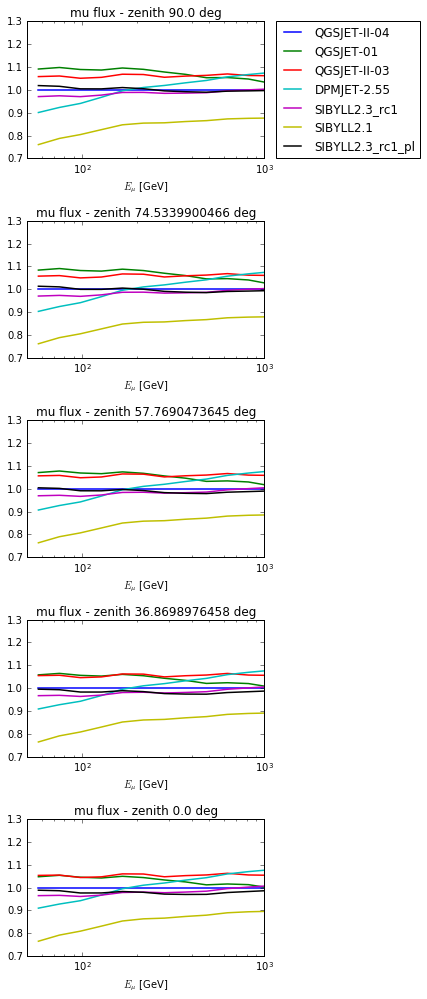

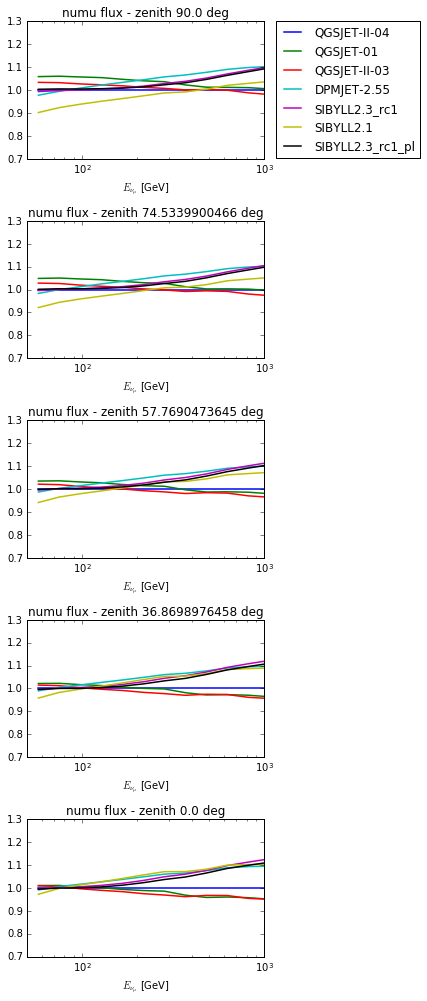

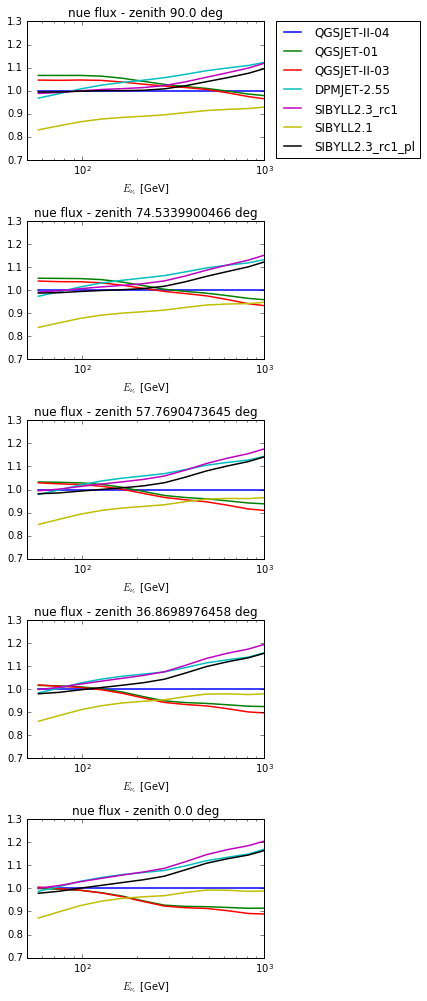

In [37]:
# Energy dependence figures
counter = 0
fig = []
zbins = [0, 4, 8, 12, 15]
for pref, lab in [('mu_',r'\mu'), ('numu_',r'\nu_\mu'), ('nue_',r'\nu_e')]:
    
    fig.append(plt.figure(figsize=(4,14)))
    fig_axes = []
    
    for angle_i, angle in enumerate(zbins):
        
        fig_axes.append(fig[-1].add_subplot(len(zbins),1,angle_i+1))
        plt.title(pref[:-1] + ' flux - zenith '+str(theta_angles_deg[angle]) + ' deg')
    
    
        for index, had_model in enumerate(int_models):
            plt.plot(e_grid, 
                     fluxes[had_model][pref + 'total'][:,angle_i] /\
                     fluxes[int_models[0]][pref + 'total'][:,angle_i], 
                     ls='-', lw=1.5,
                     label=had_model)
        plt.xlim([50, 1000])
        plt.ylim([0.7,1.3])
        plt.xscale('log')
        
        if angle_i == 0:
            #plt.legend(loc=4)
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


        plt.xlabel(r"$E_{{{0}}}$ [GeV]".format(lab))
    plt.tight_layout()
    plt.savefig('Hadronic_impact_vs_E_'+pref[:-1] + '_zenith'+str(angle)+'.pdf')
    plt.savefig('Hadronic_impact_vs_E_'+pref[:-1] + '_zenith'+str(angle)+'.png')

    


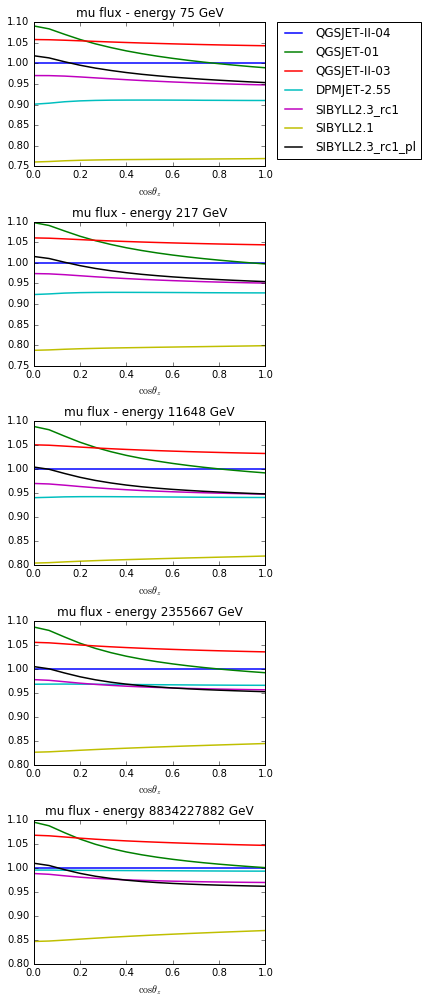

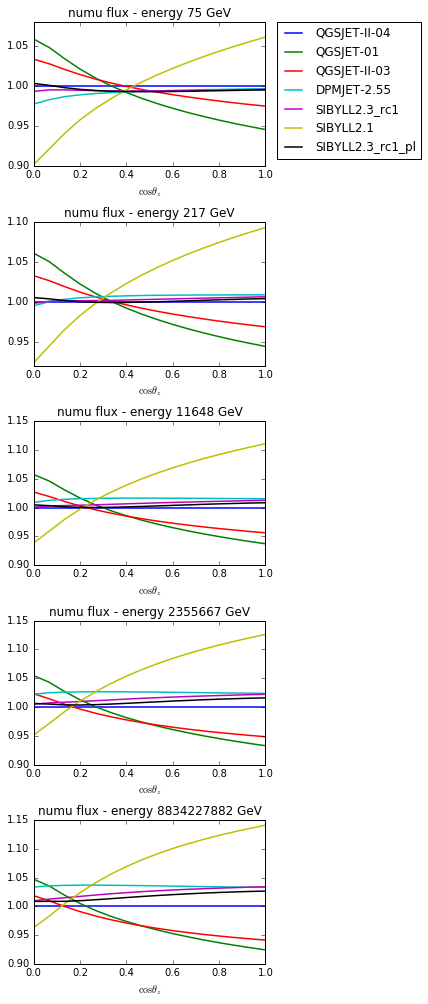

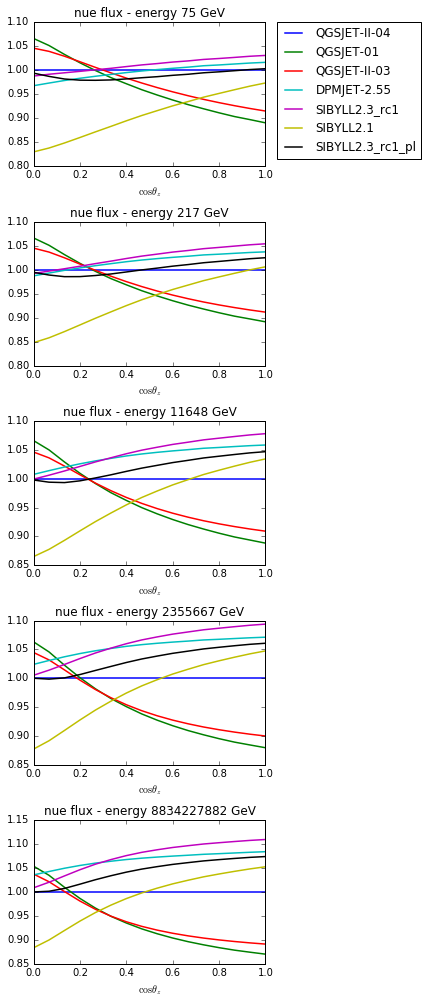

In [39]:
# Zenith dependence figures
# Cannot do all the energies, so I'll just pick 5

ebins = np.array([1, 5, 20, 40, 71])
ratio = True
if ratio:
    suffix = '_ratio'
else:
    suffix = ''

desktop = os.path.join(os.path.expanduser("~"),'Desktop')
counter = 0
fig = []
for pref, lab in [('mu_',r'\mu'), ('numu_',r'\nu_\mu'), ('nue_',r'\nu_e')]:
    
    fig.append(plt.figure(figsize=(4,14)))
    fig_axes = []
    
    for energy_i, ebin in enumerate(ebins):
        
        fig_axes.append(fig[-1].add_subplot(len(ebins),1,energy_i+1))
        plt.title(pref[:-1] + ' flux - energy '+str(int(e_grid[ebin])) + ' GeV')
    
    
        for index, had_model in enumerate(int_models):
            if ratio:
                plt.plot(np.cos(np.deg2rad(theta_angles_deg)), 
                         fluxes[had_model][pref + 'total'][energy_i,:] /\
                         fluxes[int_models[0]][pref + 'total'][energy_i,:], 
                         ls='-', lw=1.5,
                         label=had_model)
            else:
                plt.plot(np.cos(np.deg2rad(theta_angles_deg)), 
                         fluxes[had_model][pref + 'total'][energy_i,:],
                         ls='-', lw=1.5,
                         label=had_model)            
        #plt.xlim([50, 1000])
        
        if energy_i == 0:
            #plt.legend(loc=4)
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


        plt.xlabel(r"$\cos\theta_z$".format(lab))
    plt.tight_layout()
    plt.savefig('Hadronic_impact_vs_Z_'+str(pref[:-1]) + '_energy'+str(int(e_grid[ebin]))+suffix+'.pdf')
    plt.savefig('Hadronic_impact_vs_Z_'+str(pref[:-1]) + '_energy'+str(int(e_grid[ebin]))+suffix+'.png')

In [40]:
import pickle
pickle.dump(backup_fluxes, open('Had_interaction_mods.pckl','w'))

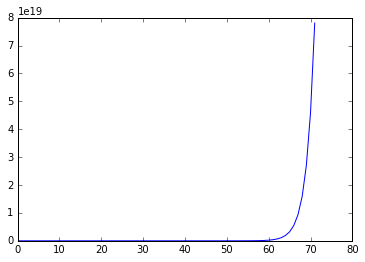

In [ ]:
class Tania():
    def __init__(self):
        
